In [50]:
import pandas as pd
import numpy as np
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")

In [4]:
# Load the data
df= pd.read_csv('./stud.csv')
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the ataset

In [5]:
df.shape

(1000, 8)

###  3. data checks to perform
1) Check Missing vallues
2) Check Duplicate vallues
3) Check Data type
4) Check the number of unique vallues
5) Check statistics of dataset
6) Check various categories present in the different categorical columns

3.1 Check missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 Chech Duplicates

In [7]:
df.duplicated().sum()

0

3.3 Check Data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking number of uniques values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


3.6 Exploring data

In [18]:
print ("Categories in 'gender; varibale: ", end= " ")
print(df['gender'].unique())

print("Categories in race_ethanicity: ", end= " ")
print(df['race_ethnicity'].unique())

print("Categories in parental level education :", end= " ")
print(df['parental_level_of_education'].unique())

Categories in 'gender; varibale:  ['female' 'male']
Categories in race_ethanicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [25]:
# Defiing numerical and categorical variables

numerical_feature= [features  for features in df.columns if df[features].dtype !="O"]
categorical_feature=[features for features in df.columns if df[features].dtype=="O"]

print(f"We have {len(numerical_feature)} Numerical Features:  {numerical_feature}")
print("We have {} Categorical features {}".format(len(categorical_feature), categorical_feature))


We have 3 Numerical Features:  ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding Total Score and Average Score varible

In [33]:
df["Total_scores"]=df['math_score']+df['reading_score']+df['writing_score']
df["Averaged_scores"]=round(df['Total_scores']/3,2)
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_scores,Averaged_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33


In [42]:
# Counting no of students in each subject

full_maths=df[df['math_score']==100]['gender'].count()
full_reading=df[df['reading_score']==100]['gender'].count()
full_writing=df[df['writing_score']==100]['gender'].count()

print("No of students with full marks in math: {}".format(full_maths))
print("No of students with full marks in writing: {}".format(full_writing))
print("No of students with full marks in reading: {}".format(full_reading))

No of students with full marks in math: 7
No of students with full marks in writing: 14
No of students with full marks in reading: 17


### 4. Exploring data with Histogram
1) Visualize the avergae score distribution to make some conclusion.
    a) Histogram
    b) Kernal Distribution Function(KDE)



Histogram and KDE

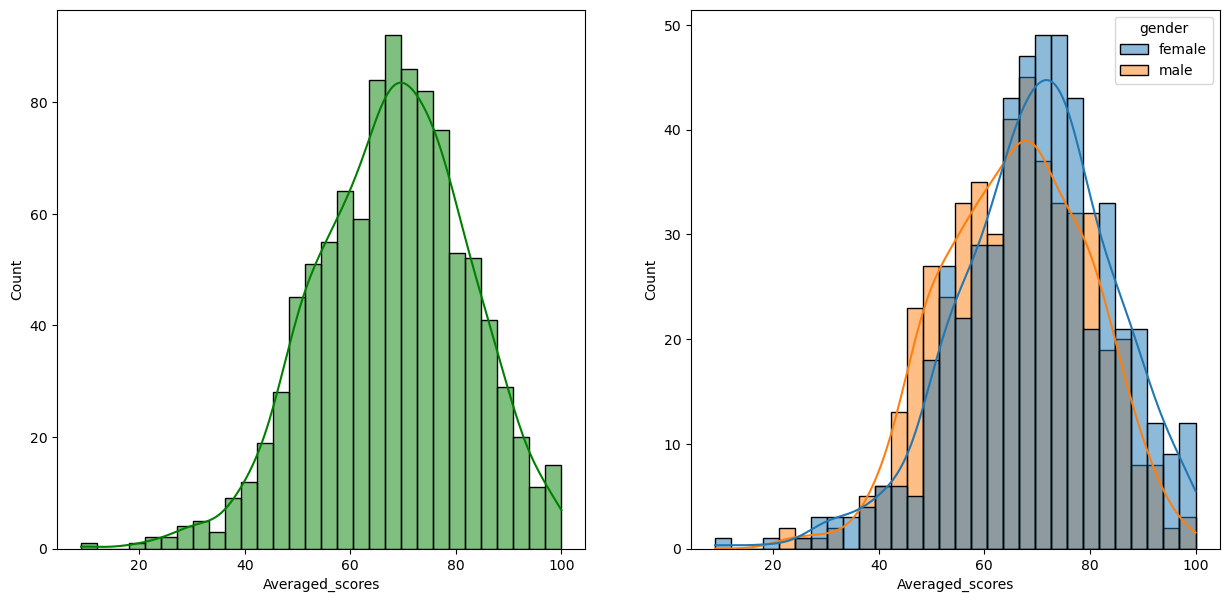

In [54]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Averaged_scores',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Averaged_scores',bins=30,kde=True,hue='gender')
plt.show()

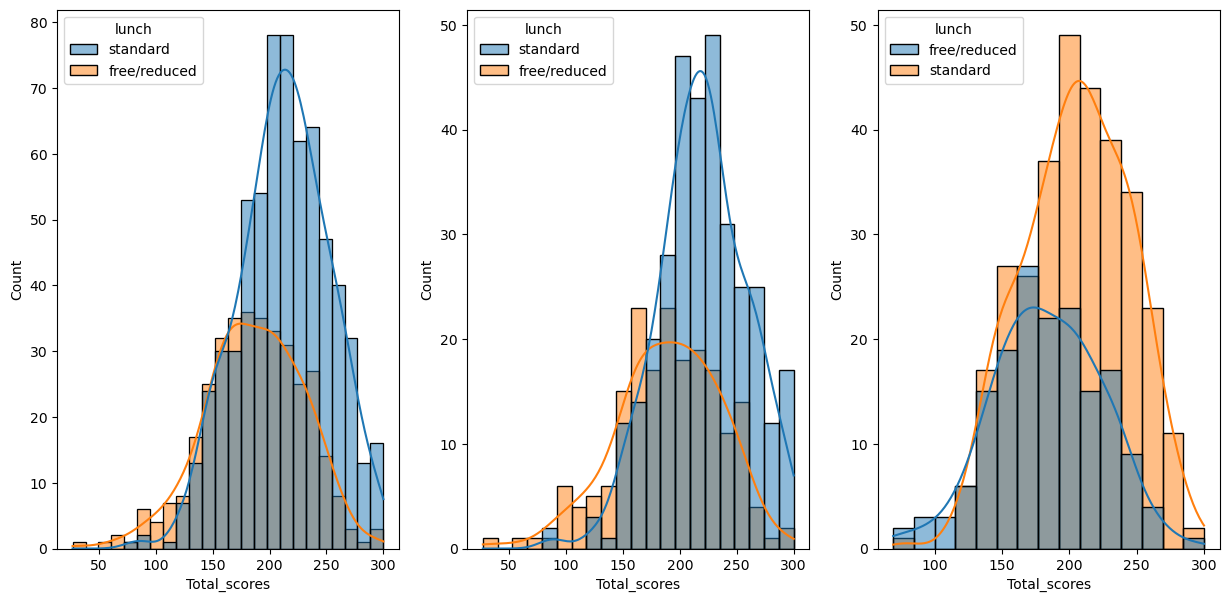

In [62]:
fig,axs= plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='Total_scores',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Total_scores',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Total_scores',kde=True,hue='lunch')
plt.show()

4.2 Maximumum score of students in all three subjects


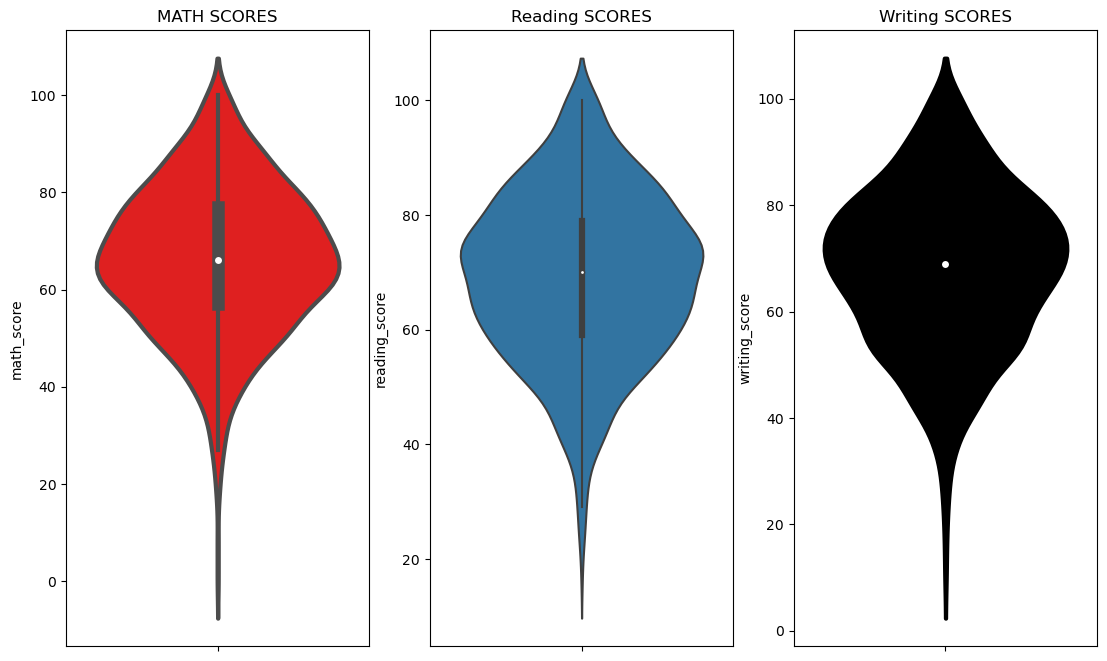

In [74]:
# Plotting violin plot

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(data=df,y="math_score",color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading SCORES')
sns.violinplot(data=df,y="reading_score")

plt.subplot(1, 4, 3)
plt.title('Writing SCORES')
sns.violinplot(data=df,y='writing_score',color='black',linewidth=3)

plt.show()


4.3 Multivariate analysis using pieplot

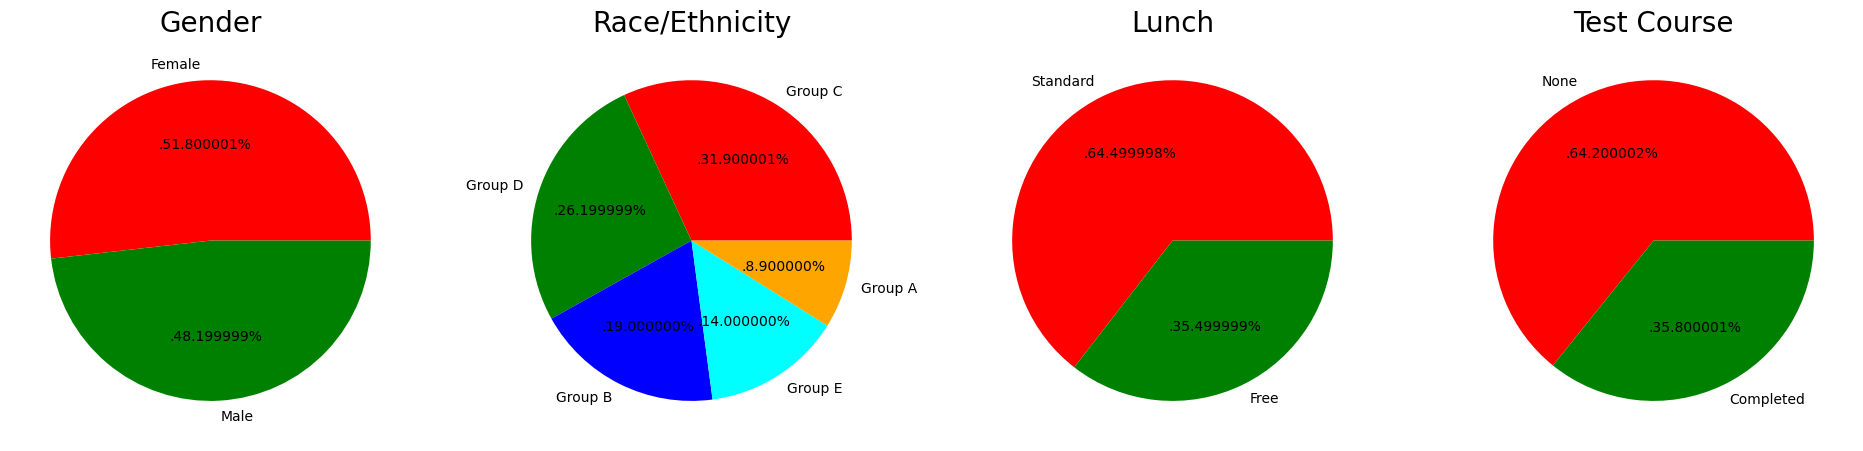

In [84]:

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']



plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.show()

4.4 Feature Wise Visualization
4.4.1 GENDER COLUMN
How is distribution of Gender ?
Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )


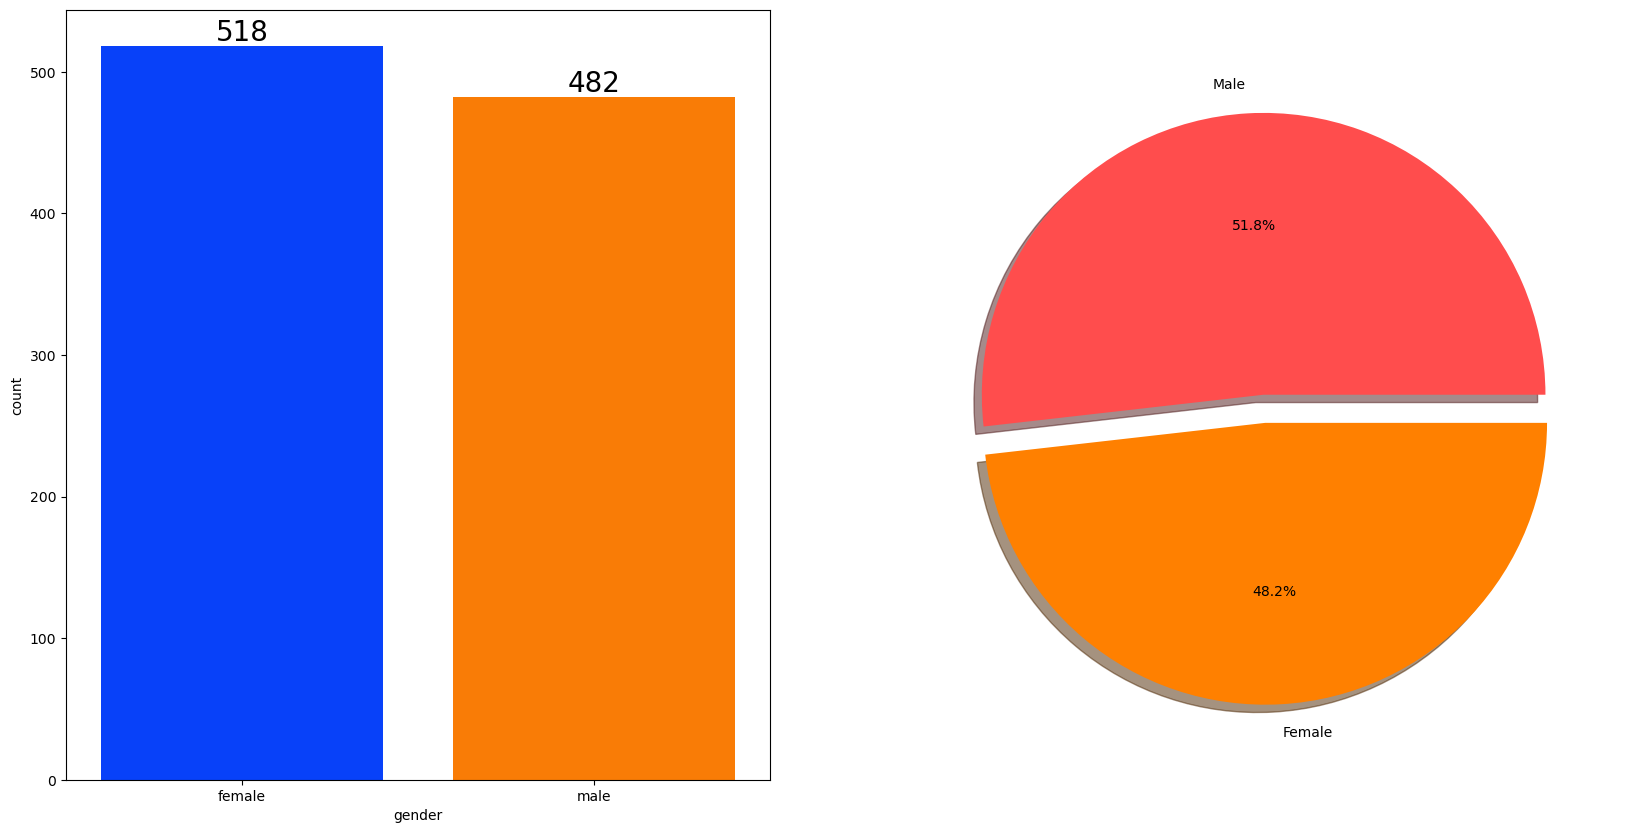

In [85]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )


In [86]:
gender_group = df.groupby('gender').mean()
gender_group

C:\Users\Kaushik\AppData\Local\Temp\ipykernel_13448\3006147241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby('gender').mean()


,math_score,reading_score,writing_score,Total_scores,Averaged_scores
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


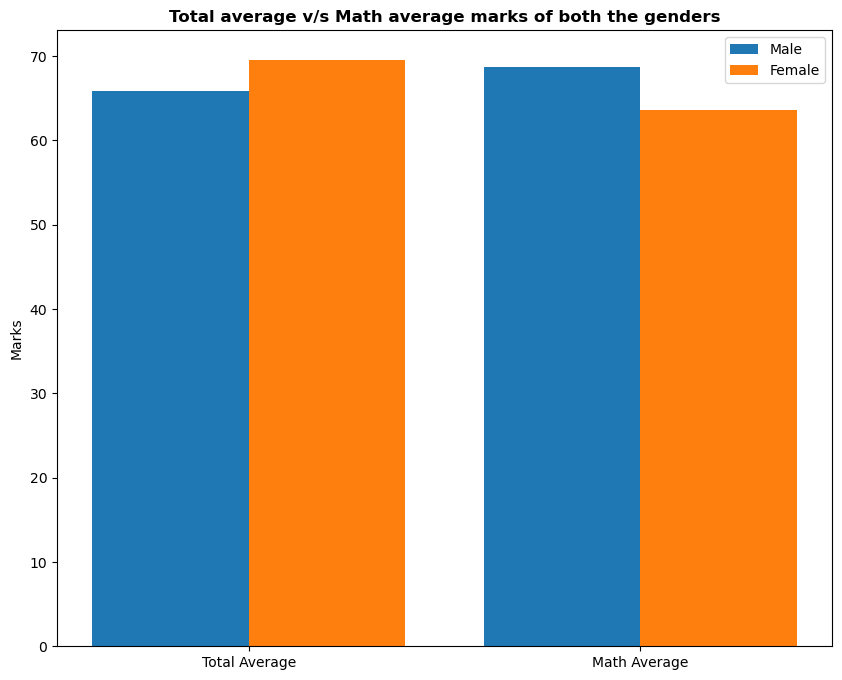

In [89]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Averaged_scores'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Averaged_scores'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)


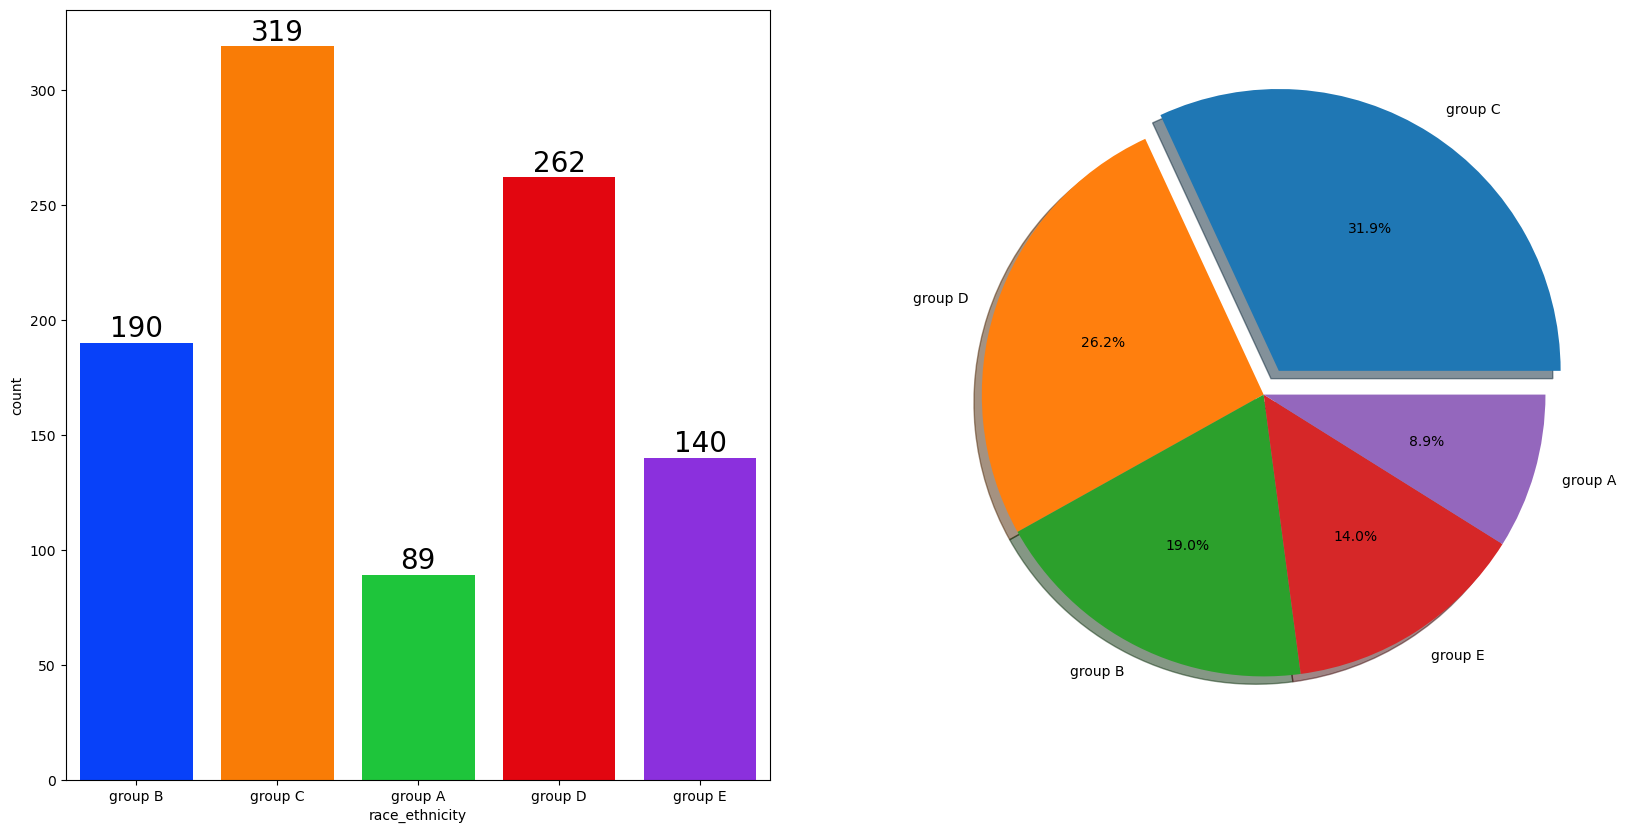

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )


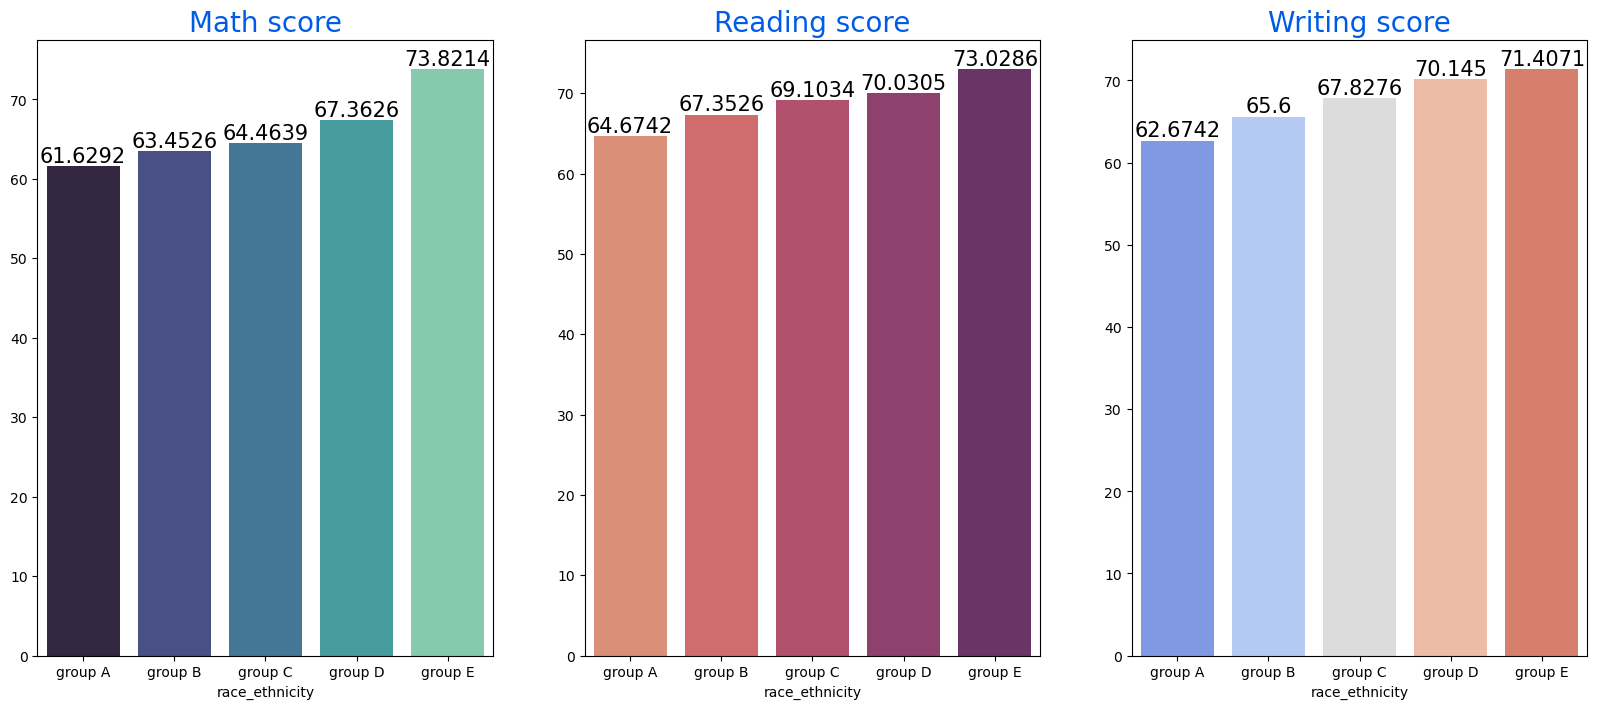

In [93]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

And so on...........


4.4.6 CHECKING OUTLIERS


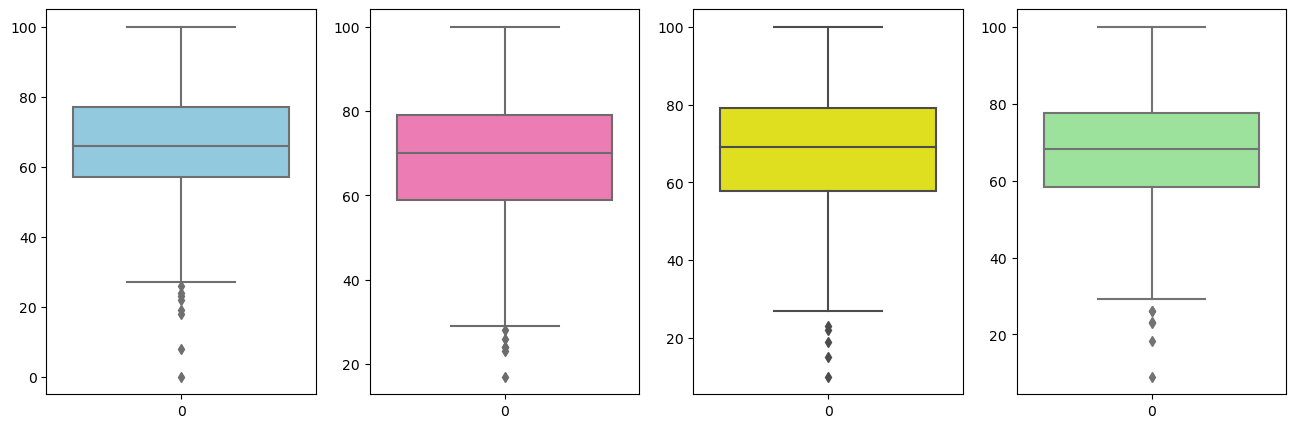

In [94]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Averaged_scores'],color='lightgreen')
plt.show()

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT


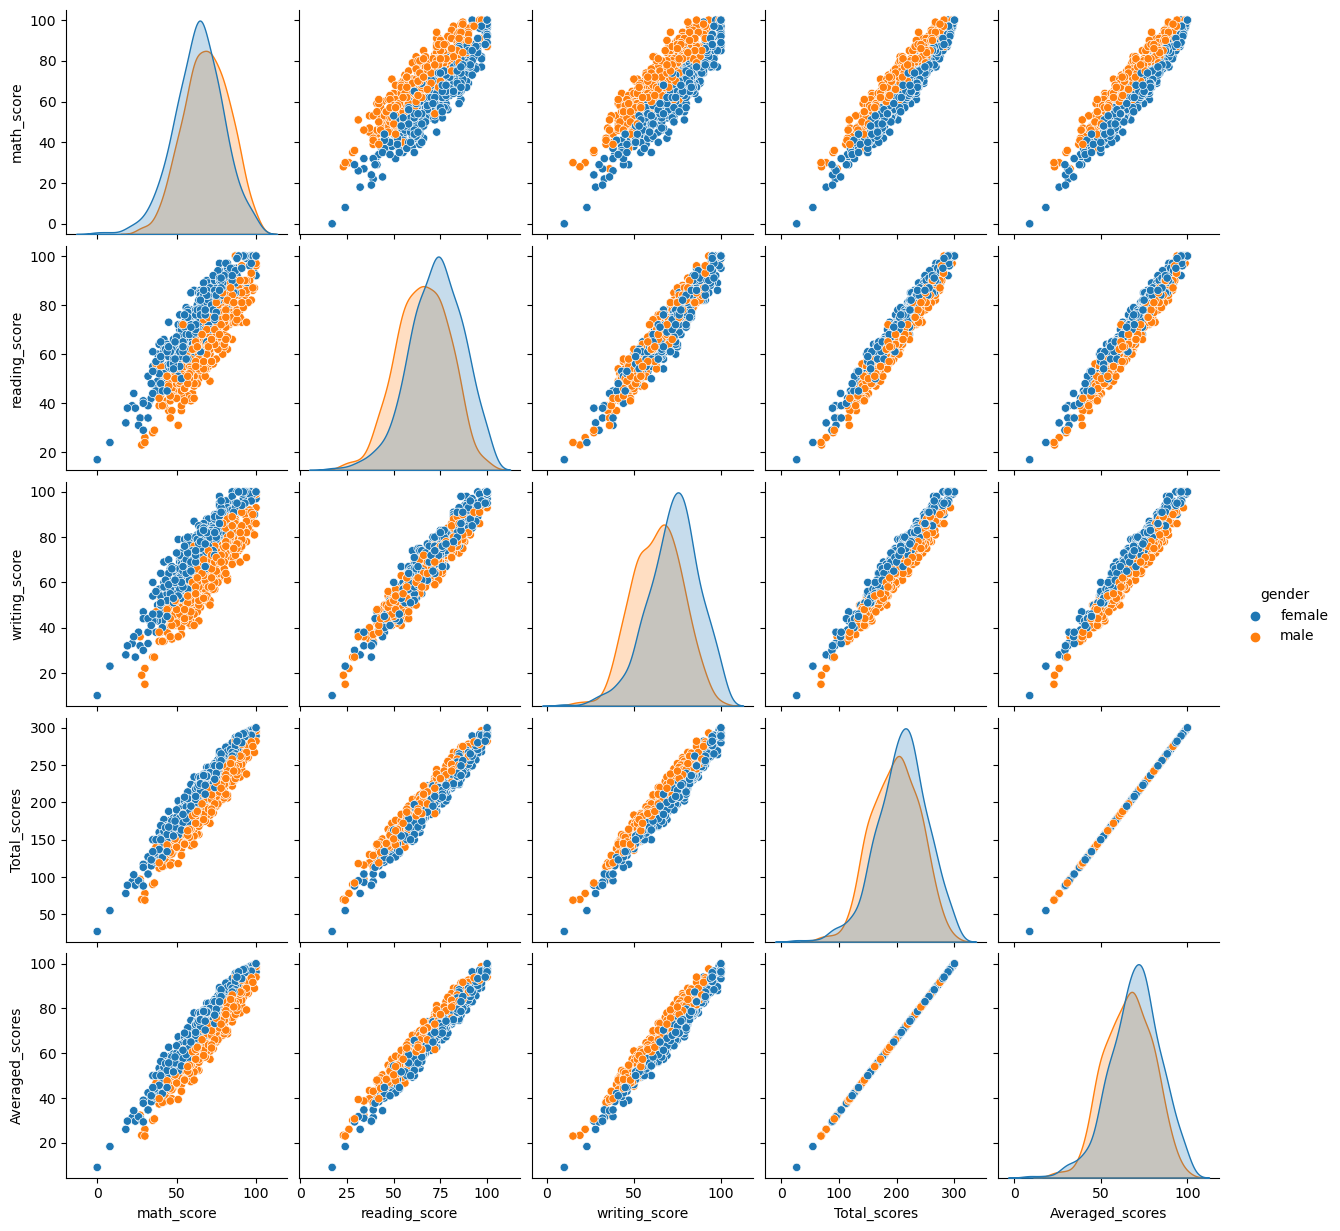

In [95]:
sns.pairplot(df,hue = 'gender')
plt.show()